# Exploratory Data Analysis
# Chicago Crime Data
## August 2019
### Dr Jose M Albornoz

# Objective

The following exploratory data analysis aims to verify the following assumption: certain types of crimes follow a temporal pattern, with their prevalence changing with the hour of the day. Similarly, there are crimes that follow a spatial distribution, with certain types of crimes concentrated in geographical hot spots.

# Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm
style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

# maximum number of rdataframe ows and columns displayed
pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 500)

RANDOM_STATE = 801
pd.options.mode.chained_assignment = None

# 1.- Load Data

In [2]:
df_0 = pd.read_csv('Datasets/chicago_crimes.csv')

In [3]:
df_0.shape

(62833, 23)

In [4]:
df_0.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4506608,9878952,HX529642,12/04/2014 09:30:00 AM,010XX E 47TH ST,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON,APARTMENT,False,True,222,2.0,4.0,39.0,04B,1183896.0,1874058.0,2014,02/04/2016 06:33:39 AM,41.809597,-87.601016,"(41.809597, -87.601016)"
1,561379,2514319,HH857213,12/24/2002 09:00:00 AM,055XX W CONGRESS PKWY,1320,CRIMINAL DAMAGE,TO VEHICLE,OTHER,False,True,1522,15.0,29.0,25.0,14,1139530.0,1897135.0,2002,04/15/2016 08:55:02 AM,41.873845,-87.763183,"(41.873845, -87.763183)"
2,5058884,3891396,HL266026,03/31/2005 11:46:00 AM,050XX N KIMBALL AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE OTHER DANG WEAPON,"SCHOOL, PUBLIC, GROUNDS",True,False,1713,17.0,39.0,13.0,15,1152801.0,1933422.0,2005,04/15/2016 08:55:02 AM,41.973168,-87.713495,"(41.973168, -87.713495)"
3,3619502,4983700,HM446634,06/30/2006 04:44:00 PM,034XX W CHICAGO AVE,2092,NARCOTICS,SOLICIT NARCOTICS ON PUBLICWAY,SIDEWALK,True,False,1121,11.0,27.0,23.0,26,1153483.0,1905125.0,2006,04/15/2016 08:55:02 AM,41.895505,-87.711742,"(41.895505, -87.711742)"
4,5533749,5284225,HM654977,10/11/2006 11:05:00 PM,007XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,False,1131,11.0,24.0,25.0,16,1144509.0,1896222.0,2006,04/15/2016 08:55:02 AM,41.871248,-87.744926,"(41.871248, -87.744926)"


In [5]:
df_0.dtypes

Unnamed: 0                int64
ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                 object
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

In [6]:
nrows0 = df_0.shape[0]

In [7]:
nrows0

62833

In [8]:
df_0["Date"].min()

'01/01/2001 02:00:29 PM'

In [9]:
df_0["Date"].max()

'12/31/2016 08:00:00 PM'

## 1.1.- Missing values?

### 1.1.1- Missing values count

In [10]:
df_0.isnull().sum()

Unnamed: 0                 0
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description      22
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                    6135
Community Area          6148
FBI Code                   0
X Coordinate             737
Y Coordinate             737
Year                       0
Updated On                 0
Latitude                 737
Longitude                737
Location                 737
dtype: int64

### 1.1.2.- Percentage of missing values

In [11]:
df_0.isnull().sum()*100./nrows0

Unnamed: 0              0.000000
ID                      0.000000
Case Number             0.000000
Date                    0.000000
Block                   0.000000
IUCR                    0.000000
Primary Type            0.000000
Description             0.000000
Location Description    0.035013
Arrest                  0.000000
Domestic                0.000000
Beat                    0.000000
District                0.000000
Ward                    9.763978
Community Area          9.784667
FBI Code                0.000000
X Coordinate            1.172951
Y Coordinate            1.172951
Year                    0.000000
Updated On              0.000000
Latitude                1.172951
Longitude               1.172951
Location                1.172951
dtype: float64

## 1.2.- Drop rows with missing values

Given the small proportion of fields with missing values, rows containing nas will be dropped (Please note that the location information contained in "Ward" and "Community Area", with almost 10% missing values, is also available in "Block" and in the supplied geographical coordinates).

In [12]:
df_0.dropna(inplace=True)

In [13]:
nrows = df_0.shape[0]

In [14]:
nrows

56020

In [15]:
# percentage of reduction in dataset size
(nrows0 - nrows)*100/nrows0

10.843028344977958

## 1.3.- Convert Date to Datetime

In [16]:
df_0['Date'] = pd.to_datetime(df_0['Date'], format='%m/%d/%Y %I:%M:%S %p') 

## 1.4.- Number of unique values

In [17]:
df_0.nunique()

Unnamed: 0              56020
ID                      56020
Case Number             56020
Date                    53948
Block                   18815
IUCR                      295
Primary Type               28
Description               273
Location Description      101
Arrest                      2
Domestic                    2
Beat                      302
District                   22
Ward                       50
Community Area             78
FBI Code                   25
X Coordinate            29275
Y Coordinate            34154
Year                       17
Updated On                709
Latitude                43719
Longitude               43722
Location                43726
dtype: int64

In [18]:
df_0["Description"].unique()

array(['AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON', 'TO VEHICLE',
       'UNLAWFUL USE OTHER DANG WEAPON', 'SOLICIT NARCOTICS ON PUBLICWAY',
       'SOLICIT ON PUBLIC WAY', 'POSS: CANNABIS 30GMS OR LESS',
       'UNLAWFUL ENTRY', 'OVER $500', 'RETAIL THEFT', 'FORGERY', 'SIMPLE',
       'DOMESTIC BATTERY SIMPLE', 'FORCIBLE ENTRY', 'AUTOMOBILE',
       '$500 AND UNDER', 'ATTEMPT POSSESSION NARCOTICS',
       'AGGRAVATED: HANDGUN', 'POSS: HEROIN(WHITE)',
       'OTHER VEHICLE OFFENSE', 'MANU/DELIVER:COCAINE',
       'POSSESSION OF DRUG EQUIPMENT', 'ARMED: HANDGUN', 'TO PROPERTY',
       'AGGRAVATED: OTHER DANG WEAPON', 'MANU/DELIVER:CRACK',
       'PURSE-SNATCHING', 'TRUCK, BUS, MOTOR HOME',
       'STRONGARM - NO WEAPON', 'AGGRAVATED PO:KNIFE/CUT INSTR',
       'FROM BUILDING', 'SOLICIT FOR BUSINESS', 'POSS: CRACK',
       'CREDIT CARD FRAUD', 'TO STATE SUP LAND',
       'AGGRAVATED:KNIFE/CUTTING INSTR', 'ATTEMPT FORCIBLE ENTRY',
       'TO LAND', 'AGG PO HANDS NO/MIN INJURY',
     

In [19]:
df_0["Location Description"].unique()

array(['APARTMENT', 'OTHER', 'SCHOOL, PUBLIC, GROUNDS', 'SIDEWALK',
       'STREET', 'PARK PROPERTY', 'DEPARTMENT STORE', 'RESIDENCE',
       'SCHOOL, PUBLIC, BUILDING', 'RESIDENCE-GARAGE',
       'PARKING LOT/GARAGE(NON.RESID.)', 'ALLEY', 'CURRENCY EXCHANGE',
       'DRUG STORE', 'RESIDENTIAL YARD (FRONT/BACK)',
       'RESIDENCE PORCH/HALLWAY', 'SCHOOL, PRIVATE, BUILDING',
       'CONVENIENCE STORE', 'GAS STATION', 'GOVERNMENT BUILDING/PROPERTY',
       'RESTAURANT', 'LIBRARY', 'SMALL RETAIL STORE',
       'CHA HALLWAY/STAIRWELL/ELEVATOR', 'ATHLETIC CLUB',
       'VACANT LOT/LAND', 'CLEANING STORE', 'CTA TRAIN',
       'GROCERY FOOD STORE', 'CTA PLATFORM',
       'COMMERCIAL / BUSINESS OFFICE', 'BANK', 'BAR OR TAVERN',
       'FACTORY/MANUFACTURING BUILDING', 'HOTEL/MOTEL',
       'VEHICLE NON-COMMERCIAL', 'CHA PARKING LOT/GROUNDS',
       'SCHOOL, PRIVATE, GROUNDS', 'CTA BUS STOP', 'DAY CARE CENTER',
       'AIRCRAFT', 'NURSING HOME/RETIREMENT HOME', 'BARBERSHOP',
       'CTA BUS', 

In [20]:
df_0["Primary Type"].unique()

array(['BATTERY', 'CRIMINAL DAMAGE', 'WEAPONS VIOLATION', 'NARCOTICS',
       'PROSTITUTION', 'BURGLARY', 'THEFT', 'DECEPTIVE PRACTICE',
       'ASSAULT', 'MOTOR VEHICLE THEFT', 'OTHER OFFENSE', 'ROBBERY',
       'CRIMINAL TRESPASS', 'ARSON', 'LIQUOR LAW VIOLATION',
       'OFFENSE INVOLVING CHILDREN', 'CRIM SEXUAL ASSAULT',
       'PUBLIC PEACE VIOLATION', 'HOMICIDE', 'SEX OFFENSE',
       'INTERFERENCE WITH PUBLIC OFFICER', 'INTIMIDATION', 'GAMBLING',
       'OTHER NARCOTIC VIOLATION', 'KIDNAPPING', 'STALKING', 'OBSCENITY',
       'NON-CRIMINAL'], dtype=object)

Given the large number of levels for "Description" and "Location Description" we will not consider them for this exercise; analysing these fields will likely imply feature engineering work to reduce the number of levels.

# 2.- Analysis of Primary Types Counts

## 2.1.- Count of Crimes by Primary Type

In [21]:
df_1 = df_0.groupby("Primary Type")["ID"].count().to_frame()

In [22]:
df_1.columns = ["Count"]

In [23]:
df_1.sort_values(by="Count", inplace=True, ascending=False)

In [24]:
df_1.shape

(28, 1)

In [25]:
df_1.head(28)

,Count
Primary Type,
THEFT,11626
BATTERY,10247
CRIMINAL DAMAGE,6428
NARCOTICS,6172
OTHER OFFENSE,3434
ASSAULT,3420
BURGLARY,3328
MOTOR VEHICLE THEFT,2595
ROBBERY,2109


In [26]:
# list of all crime primary types
crime_types = df_1.index.to_list()

In [27]:
df_1 = df_1*100/nrows

In [28]:
df_1.columns = ["Percent"]

In [29]:
df_1["Cumulative (%)"] = df_1["Percent"].cumsum()

(0, 25)

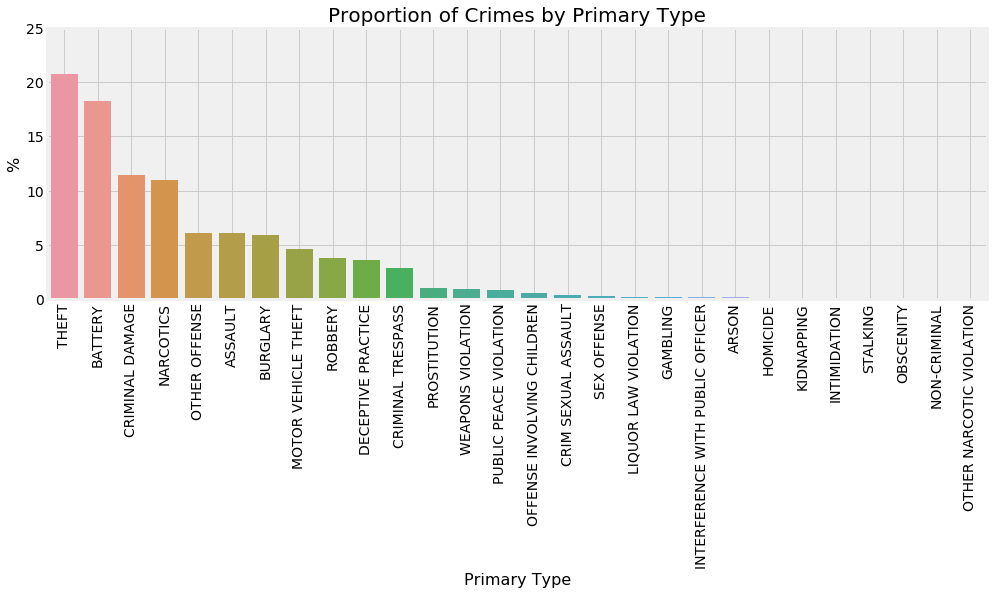

In [30]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df_1.index, y="Percent", data=df_1)  
#ax.set_xticklabels(labels, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.ylabel("%", fontsize=16)
ax.set_xlabel('Primary Type', fontsize=16)
plt.title('Proportion of Crimes by Primary Type', fontsize=20)
plt.grid(True)
plt.ylim(0,25)
#plt.tight_layout()

(0, 102)

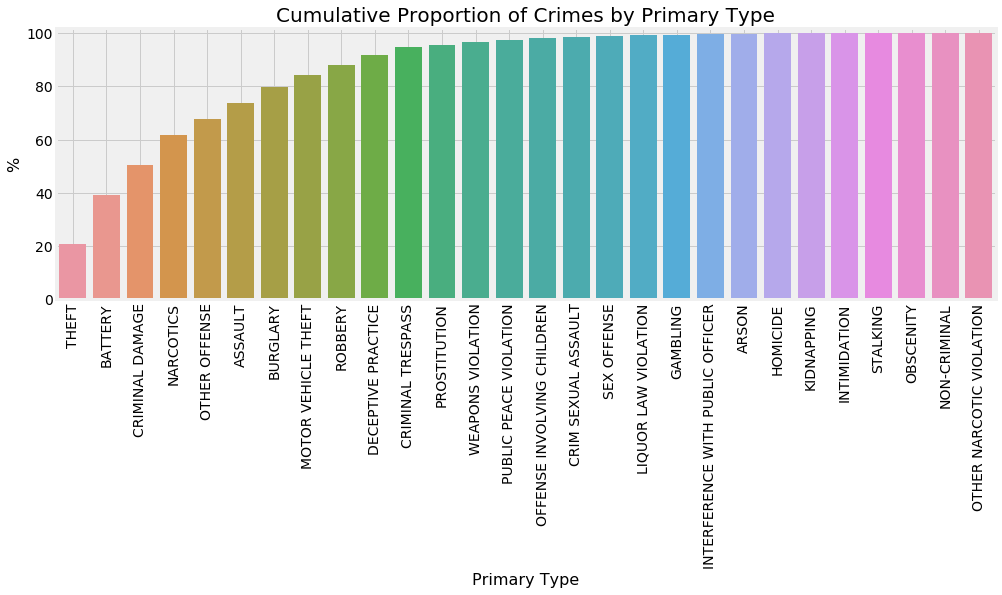

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(x=df_1.index, y="Cumulative (%)", data=df_1)  
#ax.set_xticklabels(labels, fontsize=14)
plt.xticks(rotation=90, fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.ylabel("%", fontsize=16)
ax.set_xlabel('Primary Type', fontsize=16)
plt.title('Cumulative Proportion of Crimes by Primary Type', fontsize=20)
plt.grid(True)
plt.ylim(0,102)
#plt.tight_layout()

* 7 types of crimes (Theft, Battery, Criminal Damage, Narcotics, Other Offense, Assault and Burglary) account for 80% of all crimes.
* Theft alone accounts for roughly 20% of all crimes, followed by Battery with ~18%

## 2.2.- Count of Crimes by Description

In [32]:
df_2 = df_0.groupby("Description")["ID"].count().to_frame()

In [33]:
df_2.columns = ["Count"]

In [34]:
df_2.sort_values(by="Count", inplace=True, ascending=False)

In [35]:
df_2.shape

(273, 1)

In [36]:
df_2.head(20)

,Count
Description,
SIMPLE,6105
DOMESTIC BATTERY SIMPLE,4852
$500 AND UNDER,4224
TO VEHICLE,3092
TO PROPERTY,2916
OVER $500,2669
POSS: CANNABIS 30GMS OR LESS,2572
FORCIBLE ENTRY,2268
FROM BUILDING,2166


Notice that the descriptions above often do not make sense by themselves, hence we will examine the relationship between "Primary Type" and "Description" in the next paragraph.

## 2.3- Count of Crimes by Primary Type and Description

In [37]:
df_3 = df_0.groupby(["Primary Type", "Description"])["ID"].count().to_frame()

In [38]:
df_3.columns = ["Count"]

In [39]:
df_3.shape

(295, 1)

In [40]:
df_3.head(300)

Count
Primary Type                     Description                                              
ARSON                            AGGRAVATED                                             16
                                 ATTEMPT ARSON                                          21
                                 BY FIRE                                                69
                                 POS: CHEMICAL/DRY-ICE DEVICE                            1
ASSAULT                          AGG PO HANDS NO/MIN INJURY                             72
                                 AGG PRO.EMP: HANDGUN                                    4
                                 AGG PRO.EMP: OTHER DANG WEAPON                          6
                                 AGG PRO.EMP: OTHER FIREARM                              1
                                 AGG PRO.EMP:KNIFE/CUTTING INST                          3
                                 AGGRAVATED PO: HANDGUN                                  4
                                 AGGRAVATED PO: OTHER DANG WEAP                          9
                                 AGGRAVATED PO: OTHER FIREARM                            1
                                 AGGRAVATED PO:KNIFE/CUT INSTR                           6
                                 AGGRAVATED: HANDGUN                                   377
                                 AGGRAVATED: OTHER DANG WEAPON                         188
                                 AGGRAVATED: OTHER FIREARM                              11
                                 AGGRAVATED:KNIFE/CUTTING INSTR                        240
                                 PRO EMP HANDS NO/MIN INJURY                           136
                                 SIMPLE                                               2362
BATTERY                          AGG PO HANDS ETC SERIOUS INJ                            1
                                 AGG PO HANDS NO/MIN INJURY                            124
                                 AGG PRO EMP HANDS SERIOUS INJ                           8
                                 AGG PRO.EMP: HANDGUN                                    1
                                 AGG PRO.EMP: OTHER DANG WEAPON                         16
                                 AGG PRO.EMP:KNIFE/CUTTING INST                          2
                                 AGG: HANDS/FIST/FEET NO/MINOR INJURY                   32
                                 AGG: HANDS/FIST/FEET SERIOUS INJURY                    19
                                 AGGRAVATED DOMESTIC BATTERY                            15
                                 AGGRAVATED DOMESTIC BATTERY: HANDGUN                    1
                                 AGGRAVATED DOMESTIC BATTERY: HANDS/FIST/FEET SE...     34
                                 AGGRAVATED DOMESTIC BATTERY: KNIFE/CUTTING INST       101
                                 AGGRAVATED DOMESTIC BATTERY: OTHER DANG WEAPON        148
                                 AGGRAVATED OF A CHILD                                   8
                                 AGGRAVATED OF A SENIOR CITIZEN                         19
                                 AGGRAVATED PO: HANDGUN                                  1
                                 AGGRAVATED PO: KNIFE/CUT INSTR                          2
                                 AGGRAVATED PO: OTHER DANG WEAP                         16
                                 AGGRAVATED PO: OTHER FIREARM                            1
                                 AGGRAVATED: HANDGUN                                   268
                                 AGGRAVATED: OTHER DANG WEAPON                         518
                                 AGGRAVATED: OTHER FIREARM                               6
                                 AGGRAVATED:KNIFE/CUTTING INSTR                        222
                                 DOMESTIC BATTERY SIMPLE                         

In the above table we see how each Primary Type" is linked to a set of descriptions offering further details about the crimes. As previously mentioned, given the large number of levels for "Description" we will ignore it for the purposes of this exercise, focusing on "Primary Types" instead.

# 3.- Analysis of Primary Type Counts by Time of Day

For convenience we will split the hours of the day into four 6-hour periods periods: morning (6AM - 12PM), afternoon (12PM - 6PM), evening (6PM - 12AM) and night (12AM - 6AM). The premise that will be investigated is that certain types of crimes depend on time of the day. 

In [41]:
df_0_times = df_0.set_index("Date")

In [42]:
df_morning0 = df_0_times.between_time('06:00:00', '11:59:59')

In [43]:
df_afternoon0 = df_0_times.between_time('12:00:00', '17:59:59')

In [44]:
df_evening0 = df_0_times.between_time('18:00:00', '23:59:59')

In [45]:
df_night0 = df_0_times.between_time('00:00:00', '05:59:59')

## 3.1.- Morning

In [46]:
df_morning1 = df_morning0.groupby("Primary Type")["ID"].count().to_frame()

In [47]:
df_morning1.columns = ["Count"]

In [48]:
df_morning1.sort_index(inplace=True)

In [49]:
df_morning1.shape

(26, 1)

In [50]:
df_morning1.head(28)

,Count
Primary Type,
ARSON,18
ASSAULT,714
BATTERY,1673
BURGLARY,1065
CRIM SEXUAL ASSAULT,31
CRIMINAL DAMAGE,1161
CRIMINAL TRESPASS,348
DECEPTIVE PRACTICE,559
GAMBLING,10


In [51]:
set(crime_types) - set(df_morning1.index.to_list())

{'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION'}

26 types of crimes are commited during our "morning" period, with two crimes/incidents left out: 'NON-CRIMINAL' and 'OTHER NARCOTIC VIOLATION'

## 3.2.- Afternoon

In [52]:
df_afternoon1 = df_afternoon0.groupby("Primary Type")["ID"].count().to_frame()

In [53]:
df_afternoon1.columns = ["Count"]

In [54]:
df_afternoon1.sort_index(inplace=True)

In [55]:
df_afternoon1.shape

(28, 1)

In [56]:
df_afternoon1.head(28)

,Count
Primary Type,
ARSON,14
ASSAULT,1233
BATTERY,3045
BURGLARY,1001
CRIM SEXUAL ASSAULT,43
CRIMINAL DAMAGE,1465
CRIMINAL TRESPASS,517
DECEPTIVE PRACTICE,782
GAMBLING,44


All 28 crime types are commited in the afternoon period

## 3.3.- Evening

In [57]:
df_evening1 = df_evening0.groupby("Primary Type")["ID"].count().to_frame()

In [58]:
df_evening1.columns = ["Count"]

In [59]:
df_evening1.sort_index(inplace=True)

In [60]:
df_evening1.shape

(26, 1)

In [61]:
df_evening1.head(28)

,Count
Primary Type,
ARSON,23
ASSAULT,1087
BATTERY,3374
BURGLARY,804
CRIM SEXUAL ASSAULT,57
CRIMINAL DAMAGE,2326
CRIMINAL TRESPASS,555
DECEPTIVE PRACTICE,354
GAMBLING,67


In [62]:
set(crime_types) - set(df_evening1.index.to_list())

{'NON-CRIMINAL', 'OTHER NARCOTIC VIOLATION'}

Just as during the morning period, two offenses are not commited in the "evening" period: 'NON-CRIMINAL' and 'OTHER NARCOTIC VIOLATION'

## 3.4.- Night

In [63]:
df_night1 = df_night0.groupby("Primary Type")["ID"].count().to_frame()

In [64]:
df_night1.columns = ["Count"]

In [65]:
df_night1.sort_index(inplace=True)

In [66]:
df_night1.shape

(25, 1)

In [67]:
df_night1.head(28)

,Count
Primary Type,
ARSON,52
ASSAULT,386
BATTERY,2155
BURGLARY,458
CRIM SEXUAL ASSAULT,73
CRIMINAL DAMAGE,1476
CRIMINAL TRESPASS,201
DECEPTIVE PRACTICE,331
GAMBLING,8


In [68]:
set(crime_types) - set(df_night1.index.to_list())

{'NON-CRIMINAL', 'OBSCENITY', 'OTHER NARCOTIC VIOLATION'}

3 types of crimes are not commited during our "night" period: 'NON-CRIMINAL', 'OBSCENITY' and 'OTHER NARCOTIC VIOLATION'

We will now plot crime counts for each of the time periods defined above.

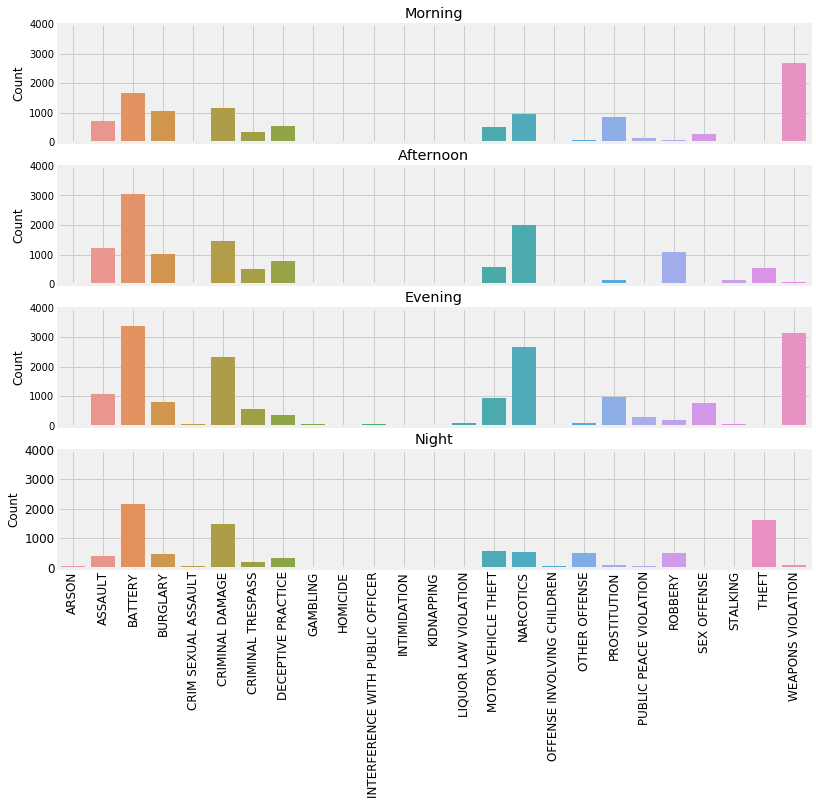

In [69]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12,10), sharex=True)

sns.barplot(x=df_morning1.index, y="Count", data=df_morning1, ax=ax1).set_title('Morning')  
sns.barplot(x=df_afternoon1.index, y="Count", data=df_afternoon1, ax=ax2).set_title('Afternoon') 
sns.barplot(x=df_evening1.index, y="Count", data=df_evening1, ax=ax3).set_title('Evening')  
sns.barplot(x=df_night1.index, y="Count", data=df_night1, ax=ax4).set_title('Night') 

ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

ax1.set_xlabel('')
ax2.set_xlabel('')
ax3.set_xlabel('')
ax4.set_xlabel('')

ax1.set_ylim(0,4000)
ax2.set_ylim(0,4000)
ax3.set_ylim(0,4000)
ax4.set_ylim(0,4000)

#ax.set_xticklabels(labels, fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
#plt.ylabel("%", fontsize=16)
#ax.set_xlabel('Primary Type', fontsize=16)
#plt.title('Proportion of Crimes by Primary Type', fontsize=20)
plt.grid(True)
#plt.ylim(0,25)
#plt.tight_layout()

#f, axes = plt.subplots(1, 2)


In spite of the coarse temporal granularity used in this analysis, clear differences in crime counts by type can be appreciated in the above plot. Taking for instance "Narcotics" we can seen that the count of offenses is higher in the afternoon and evening periods, and "Theft" has the highest count during the night period. This supports the hypothesis that some crimes tend to happen during certain periods of the day.

# 4.- Analysis of Crime Types by Location

Now we will plot each crime types over Chicago's map of police beats to investigate possible relation between crime type and location. We will take advantage of the geographical coordinates supplied in the data, whilst ignoring other location information.

In [70]:
geometry = [Point(xy) for xy in zip(df_0['Longitude'], df_0['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_0, crs=crs, geometry=geometry)

In [71]:
# we read shapefile for Chicago's police beat map
street_map = gpd.read_file('geo_export_c62ff18f-5cc5-4089-aac7-586182864a4f.shp')

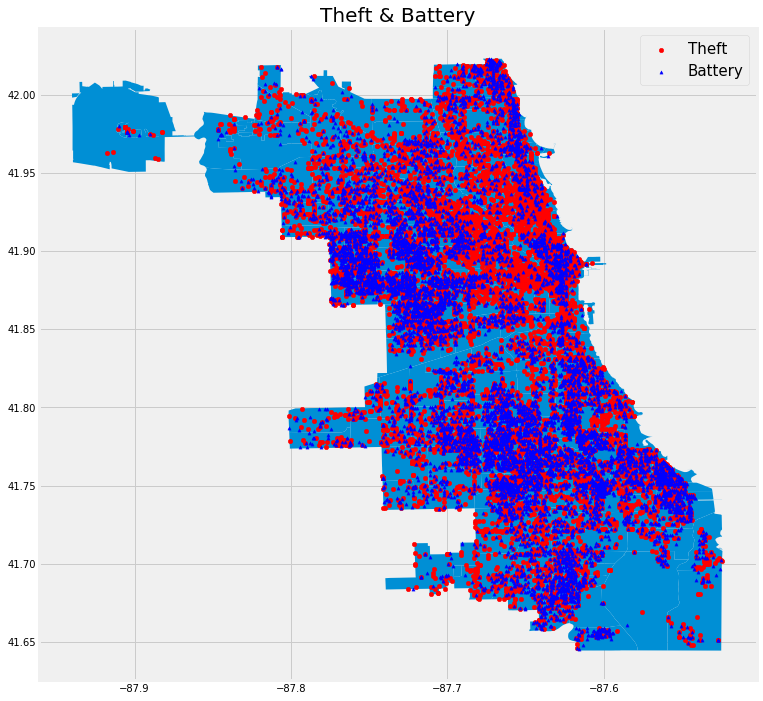

In [101]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'THEFT'].plot(ax=ax, markersize=20, color='red', marker='o', label='Theft')
geo_df[geo_df['Primary Type'] == 'BATTERY'].plot(ax=ax, markersize=10, color='blue', marker='^', label='Battery')
plt.title('Theft & Battery', fontsize=20)                                                        
plt.legend(prop={'size':15})

From the above plot we can see that theft is more prevalent in some areas (e.g. along the northern coast of the city) as eveidenced by the density of red points; by the same token we can observe areas with a high prevalence of battery offenses (e.g. South Side).

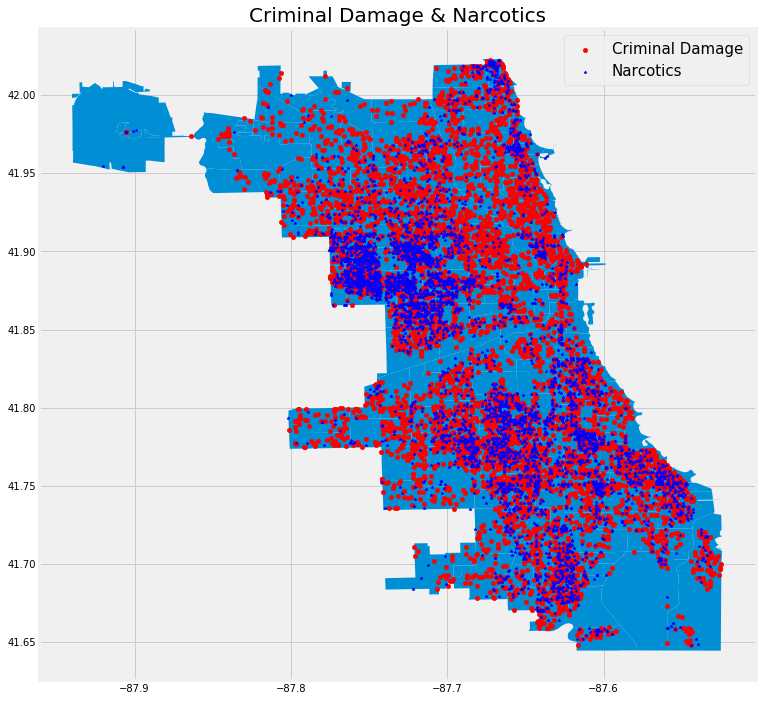

In [102]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'CRIMINAL DAMAGE'].plot(ax=ax, markersize=20, color='red', marker='o', label='Criminal Damage')
geo_df[geo_df['Primary Type'] == 'NARCOTICS'].plot(ax=ax, markersize=10, color='blue', marker='*', label='Narcotics')                                                         
plt.title('Criminal Damage & Narcotics', fontsize=20)                                                        
plt.legend(prop={'size':15})

As in the case of "Theft" and "Battery", there are areas with a clear concentration of narcotics and criminal damage-related offfenses (e.g. the city's northwest).

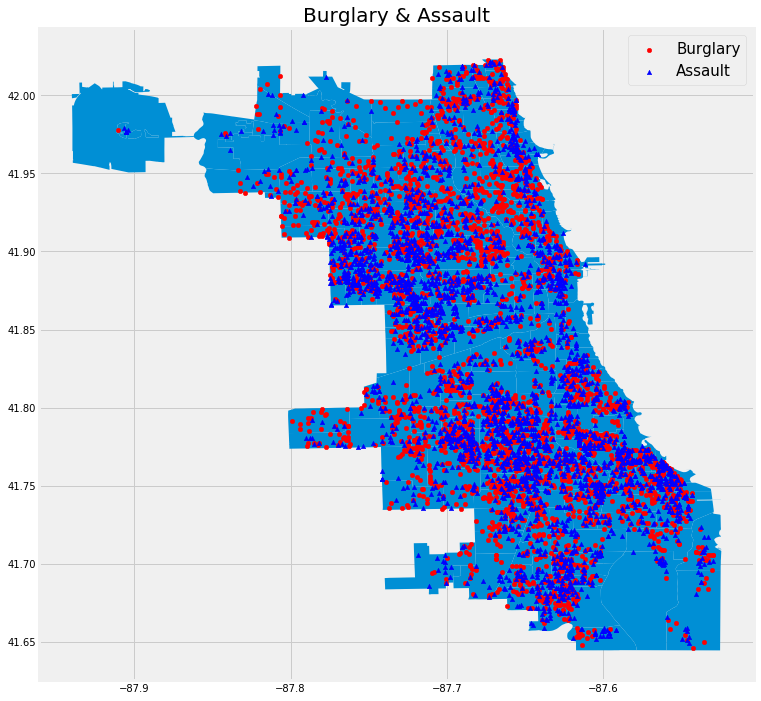

In [74]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'BURGLARY'].plot(ax=ax, markersize=20, color='red', marker='o', label='Burglary')
geo_df[geo_df['Primary Type'] == 'ASSAULT'].plot(ax=ax, markersize=20, color='blue', marker='^', label='Assault')
plt.title('Burglary & Assault', fontsize=20)                                                        
plt.legend(prop={'size':15})

Burglary & assault offenses are widespread throughout Chicago, but there are pockets in the city where these offenses have not been observed (e.g. along the Chicago canal)

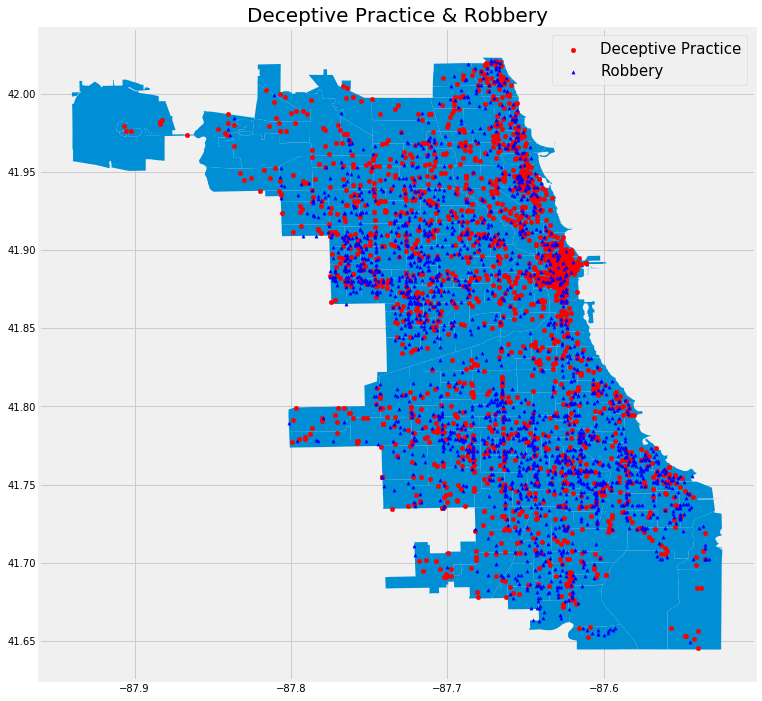

In [103]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'DECEPTIVE PRACTICE'].plot(ax=ax, markersize=20, color='red', marker='o', label='Deceptive Practice')
geo_df[geo_df['Primary Type'] == 'ROBBERY'].plot(ax=ax, markersize=10, color='blue', marker='^', label='Robbery')
plt.title('Deceptive Practice & Robbery', fontsize=20)                                                        
plt.legend(prop={'size':15})

In contrast with other types of crimes, the density of robbery and deceptive practices offenses is lower; however clear areas can be oserved where there is a higher concentration of these offenses (e.g. there is a high prevalence of robbery in the city's South Side, and a hotspot for deceptive practices can be seen in the city centre.)

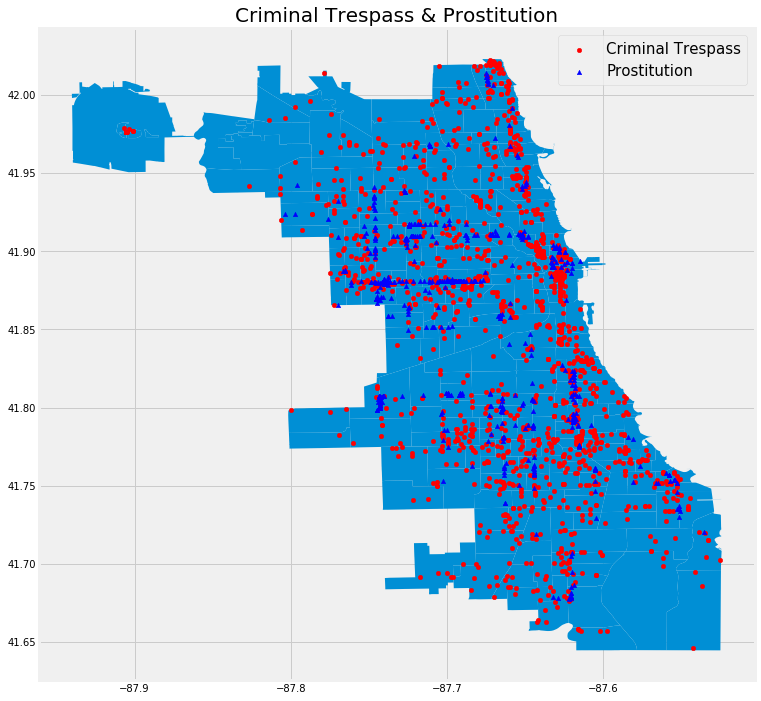

In [76]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'CRIMINAL TRESPASS'].plot(ax=ax, markersize=20, color='red', marker='o', label='Criminal Trespass')
geo_df[geo_df['Primary Type'] == 'PROSTITUTION'].plot(ax=ax, markersize=20, color='blue', marker='^', label='Prostitution')
plt.title('Criminal Trespass & Prostitution', fontsize=20)                                                        
plt.legend(prop={'size':15})

There is an interesting pattern to prostitution offenses as they seem to be concentrated along certain streets. Hotspots for criminal tresspass can also be identified.

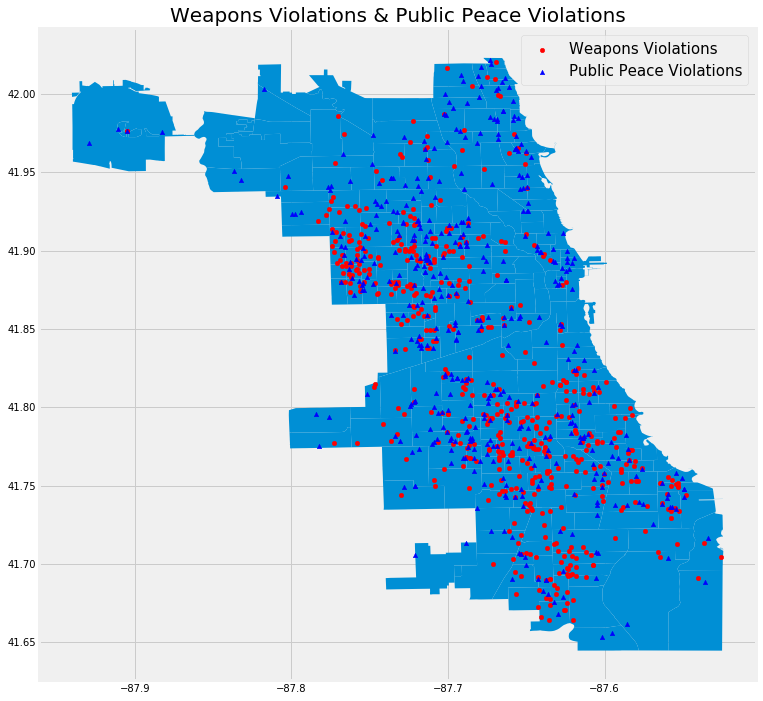

In [77]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'WEAPONS VIOLATION'].plot(ax=ax, markersize=20, color='red', marker='o', label='Weapons Violations')
geo_df[geo_df['Primary Type'] == 'PUBLIC PEACE VIOLATION'].plot(ax=ax, markersize=20, color='blue', marker='^', label='Public Peace Violations')
plt.title('Weapons Violations & Public Peace Violations', fontsize=20)                                                        
plt.legend(prop={'size':15})

Areas where there are hotspots for weapons and public peace violations can be seen

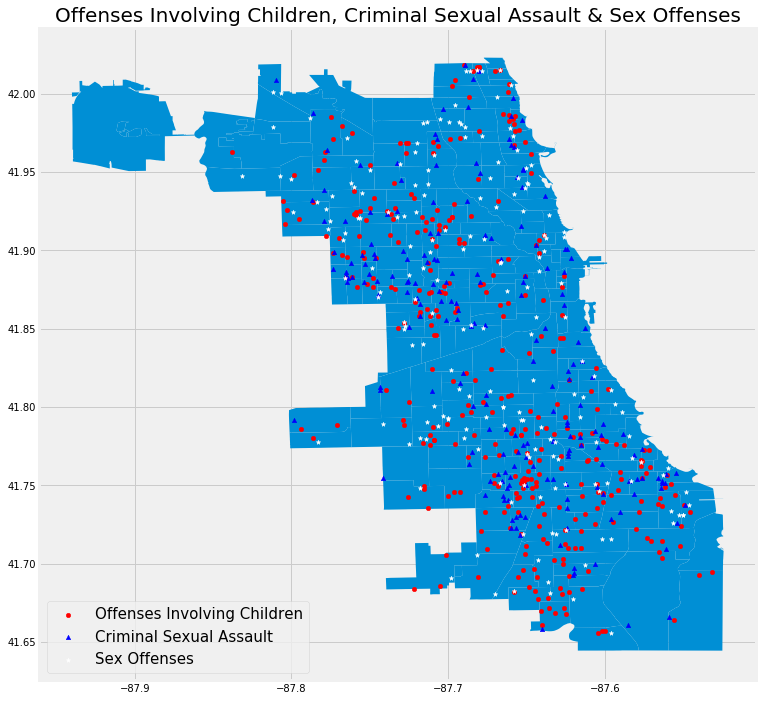

In [78]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN'].plot(ax=ax, markersize=20, color='red', marker='o', label='Offenses Involving Children')
geo_df[geo_df['Primary Type'] == 'CRIM SEXUAL ASSAULT'].plot(ax=ax, markersize=20, color='blue', marker='^', label='Criminal Sexual Assault')
geo_df[geo_df['Primary Type'] == 'SEX OFFENSE'].plot(ax=ax, markersize=20, color='white', marker='*', label='Sex Offenses')
plt.title('Offenses Involving Children, Criminal Sexual Assault & Sex Offenses', fontsize=20)                                                        
plt.legend(prop={'size':15})

None of the three offences plotted above happen in the O'Hare Airport area. As with all other crimes there are locations where these offenses are concentrated.

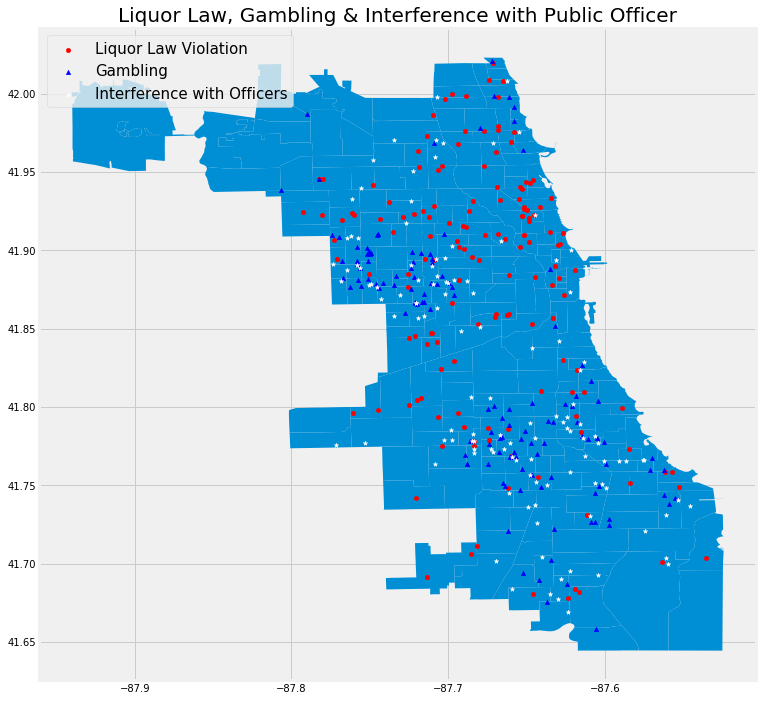

In [79]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'LIQUOR LAW VIOLATION'].plot(ax=ax, markersize=20, color='red', marker='o', label='Liquor Law Violation')
geo_df[geo_df['Primary Type'] == 'GAMBLING'].plot(ax=ax, markersize=20, color='blue', marker='^', label='Gambling')
geo_df[geo_df['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER'].plot(ax=ax, markersize=20, color='white', marker='*', label='Interference with Officers')
plt.title('Liquor Law, Gambling & Interference with Public Officer', fontsize=20)                                                        
plt.legend(prop={'size':15})

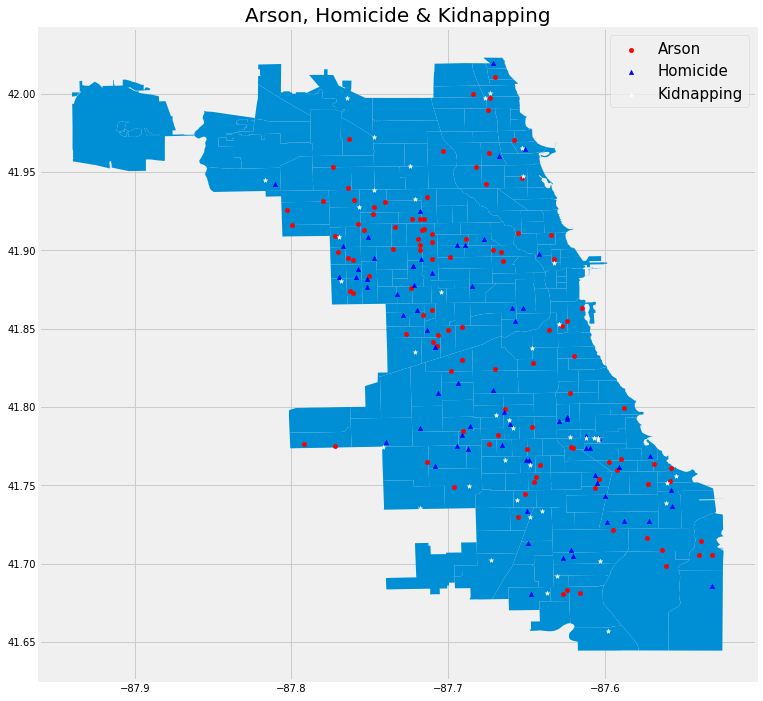

In [80]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'ARSON'].plot(ax=ax, markersize=20, color='red', marker='o', label='Arson')
geo_df[geo_df['Primary Type'] == 'HOMICIDE'].plot(ax=ax, markersize=20, color='blue', marker='^', label='Homicide')
geo_df[geo_df['Primary Type'] == 'KIDNAPPING'].plot(ax=ax, markersize=20, color='white', marker='*', label='Kidnapping')
plt.title('Arson, Homicide & Kidnapping', fontsize=20)                                                        
plt.legend(prop={'size':15})

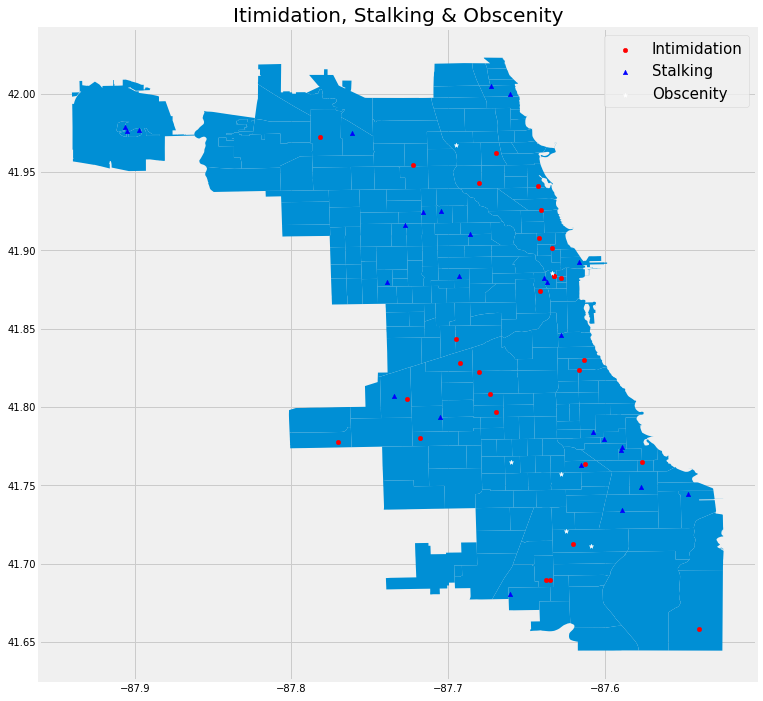

In [81]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df[geo_df['Primary Type'] == 'INTIMIDATION'].plot(ax=ax, markersize=20, color='red', marker='o', label='Intimidation')
geo_df[geo_df['Primary Type'] == 'STALKING'].plot(ax=ax, markersize=20, color='blue', marker='^', label='Stalking')
geo_df[geo_df['Primary Type'] == 'OBSCENITY'].plot(ax=ax, markersize=20, color='white', marker='*', label='Obscenity')
plt.title('Itimidation, Stalking & Obscenity', fontsize=20)                                                        
plt.legend(prop={'size':15})

There are a couple of cases in which the coordinates for particular offenses lie outside of the coordinates of the shapefile for the Chicago area. We will exclude these points in order to be able to plot locations for the corresponding crimes.

In [82]:
geo_df[(geo_df['Primary Type'] == 'OTHER OFFENSE') & (geo_df['Longitude'] < -88)].head(280)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
12096,3886151,8703142,HV379254,2012-07-10 17:45:00,020XX W NORTH AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,PARK PROPERTY,False,True,1434,14.0,32.0,24.0,26,0.0,0.0,2012,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446, -91.686566)",POINT (-91.686565684 36.619446395)


In [83]:
geo_df[(geo_df['Primary Type'] == 'MOTOR VEHICLE THEFT') & (geo_df['Longitude'] < -88)].head(280)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,geometry
33320,4341752,9450259,HX103304,2013-12-14 14:00:00,025XX N WILLETTS CT,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,1414,14.0,35.0,22.0,07,0.0,0.0,2013,02/04/2016 06:33:39 AM,36.619446,-91.686566,"(36.619446, -91.686566)",POINT (-91.686565684 36.619446395)


In [84]:
geo_df_bis = geo_df[(geo_df['ID'] != 9450259) & (geo_df['ID'] != 8703142)]

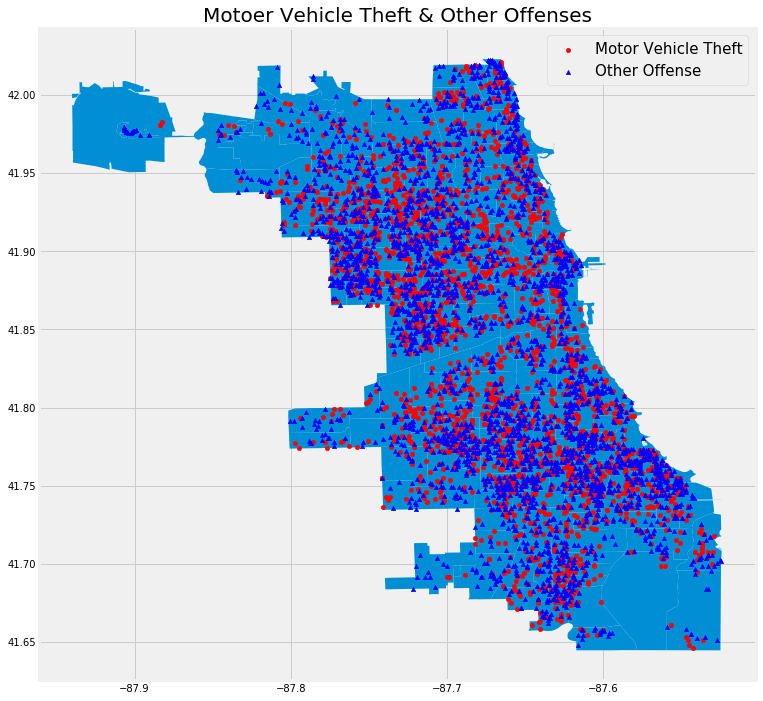

In [85]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_bis[geo_df_bis['Primary Type'] == 'MOTOR VEHICLE THEFT'].plot(ax=ax, markersize=20, color='red', marker='o', label='Motor Vehicle Theft')
geo_df_bis[geo_df_bis['Primary Type'] == 'OTHER OFFENSE'].plot(ax=ax, markersize=20, color='blue', marker='^', label='Other Offense')
plt.title('Motoer Vehicle Theft & Other Offenses', fontsize=20)                                                        
plt.legend(prop={'size':15})

As evidenced by the above plots, it's clear that there are certain areas of the city where crime is prevalent (e.g. the city's north west), and that certain types of offenses are concentrated in particulr areas (e.g. prostitution or deceptive practices). 

# 5.- Analysis of Crime Types by Location and Times

For the purpose of this exercise we will plot the locations of narcotics and prostitution offenses for the 4 time periods previously defined.

In [86]:
geometry_morn = [Point(xy) for xy in zip(df_morning0['Longitude'], df_morning0['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_df_morn = gpd.GeoDataFrame(df_morning0, crs=crs, geometry=geometry_morn)

In [87]:
geometry_aft = [Point(xy) for xy in zip(df_afternoon0['Longitude'], df_afternoon0['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_df_aft = gpd.GeoDataFrame(df_afternoon0, crs=crs, geometry=geometry_aft)

In [88]:
geometry_evg = [Point(xy) for xy in zip(df_evening0['Longitude'], df_evening0['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_df_evg = gpd.GeoDataFrame(df_evening0, crs=crs, geometry=geometry_evg)

In [89]:
geometry_ngt = [Point(xy) for xy in zip(df_night0['Longitude'], df_night0['Latitude'])]
crs = {'init': 'epsg:4326'}
geo_df_ngt = gpd.GeoDataFrame(df_night0, crs=crs, geometry=geometry_ngt)

## 5.1.- Narcotics

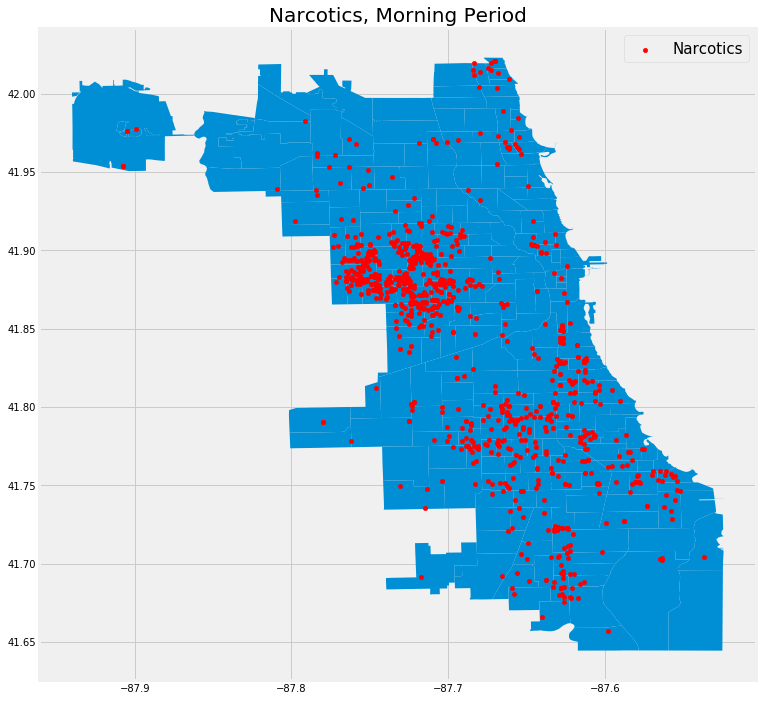

In [90]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_morn[geo_df_morn['Primary Type'] == 'NARCOTICS'].plot(ax=ax, markersize=20, color='red', marker='o', label='Narcotics')
plt.title('Narcotics, Morning Period', fontsize=20)                                                        
plt.legend(prop={'size':15})

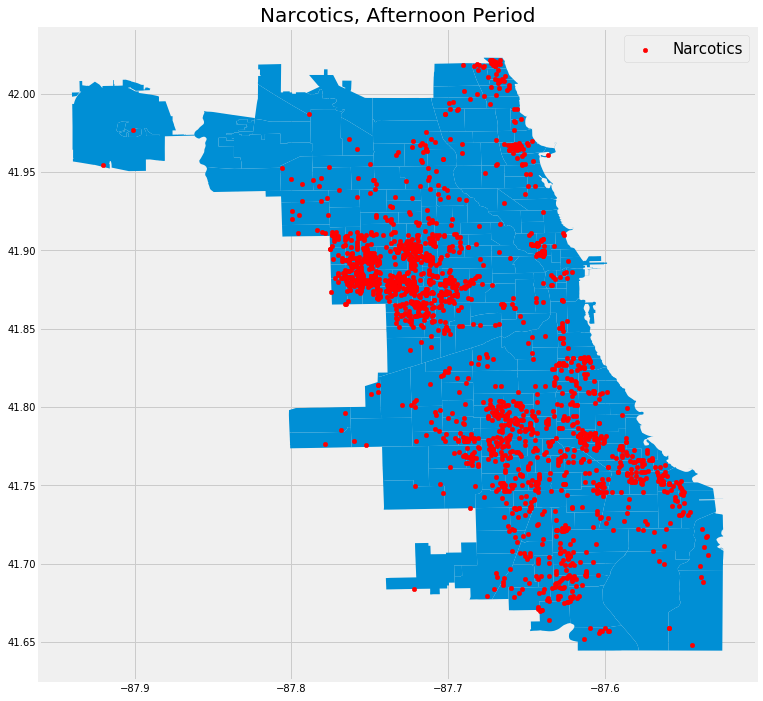

In [91]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_aft[geo_df_aft['Primary Type'] == 'NARCOTICS'].plot(ax=ax, markersize=20, color='red', marker='o', label='Narcotics')
plt.title('Narcotics, Afternoon Period', fontsize=20)                                                        
plt.legend(prop={'size':15})

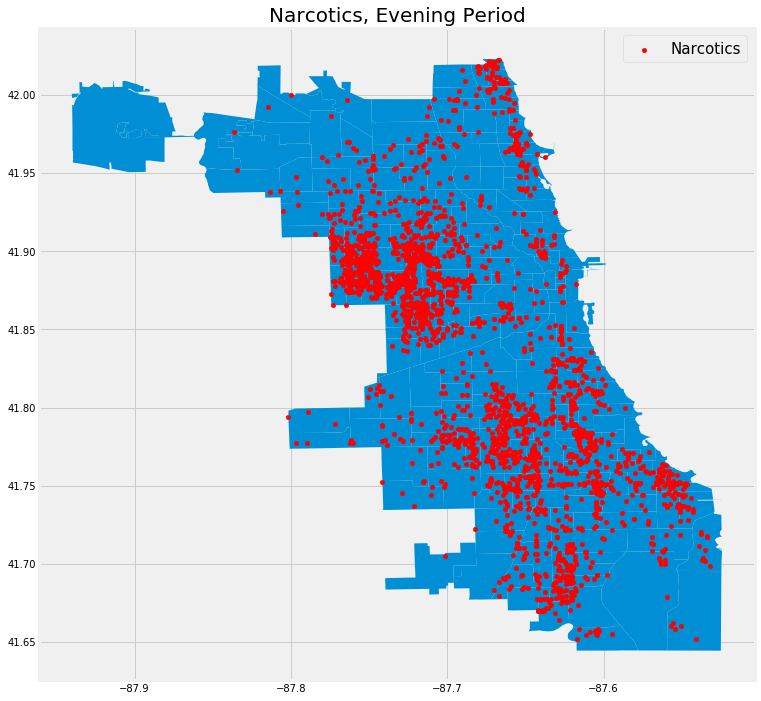

In [92]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_evg[geo_df_evg['Primary Type'] == 'NARCOTICS'].plot(ax=ax, markersize=20, color='red', marker='o', label='Narcotics')
plt.title('Narcotics, Evening Period', fontsize=20)                                                        
plt.legend(prop={'size':15})

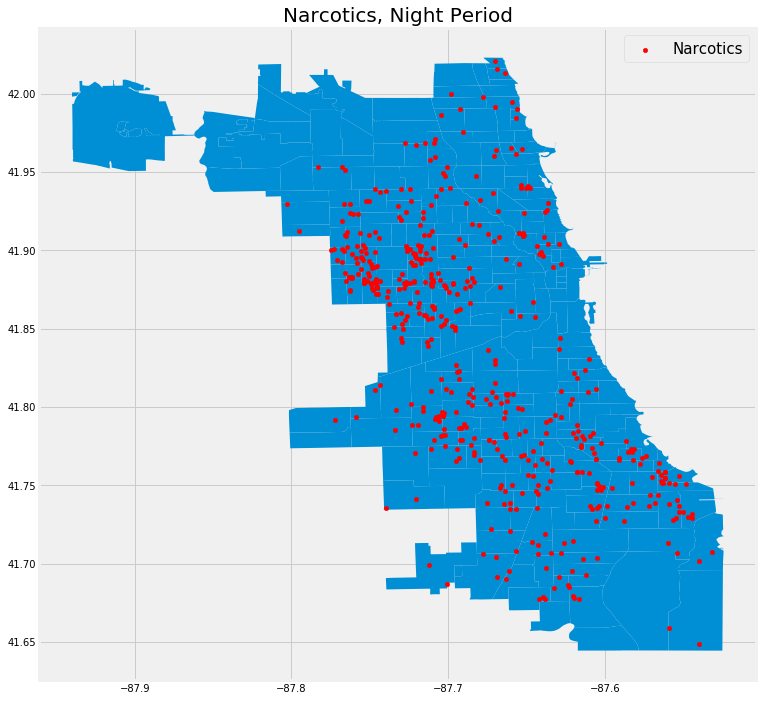

In [93]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_ngt[geo_df_ngt['Primary Type'] == 'NARCOTICS'].plot(ax=ax, markersize=20, color='red', marker='o', label='Narcotics')
plt.title('Narcotics, Night Period', fontsize=20)                                                        
plt.legend(prop={'size':15})

It can be seen that narcotics offenses are much less frequent in areas such as the city's south east and north east during the morning and night periods. We can also see how certain areas have a very high prevalence of narcotic offenses (e.g. north west side) during the morning, afternoon and evening periods.

## 5.2.- Prostitution

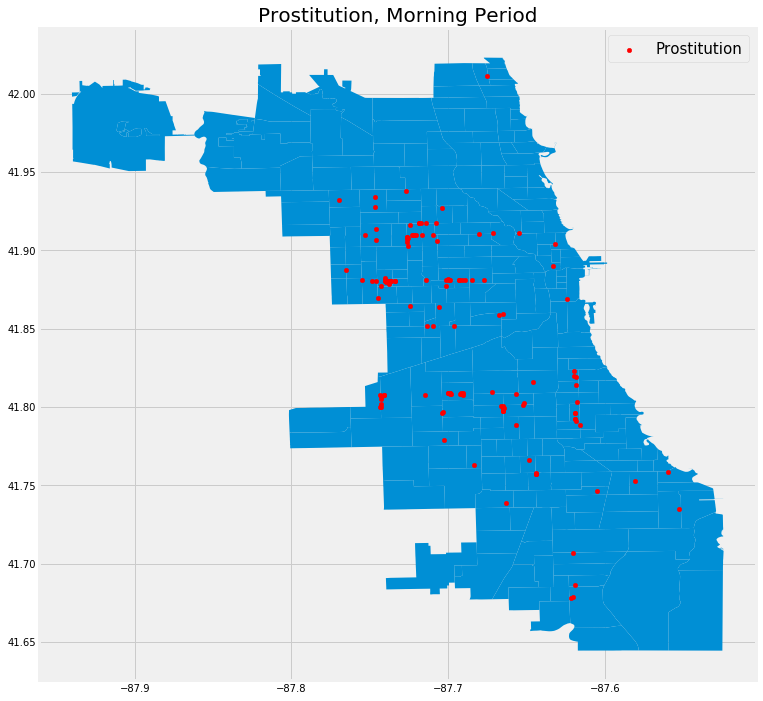

In [94]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_morn[geo_df_morn['Primary Type'] == 'PROSTITUTION'].plot(ax=ax, markersize=20, color='red', marker='o', label='Prostitution')
plt.title('Prostitution, Morning Period', fontsize=20)                                                        
plt.legend(prop={'size':15})

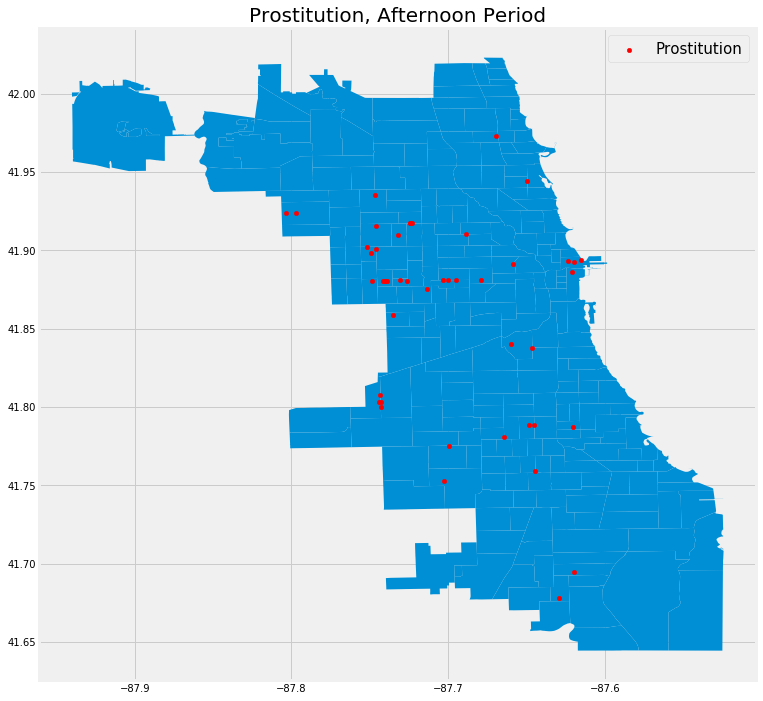

In [95]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_aft[geo_df_aft['Primary Type'] == 'PROSTITUTION'].plot(ax=ax, markersize=20, color='red', marker='o', label='Prostitution')
plt.title('Prostitution, Afternoon Period', fontsize=20)                                                        
plt.legend(prop={'size':15})

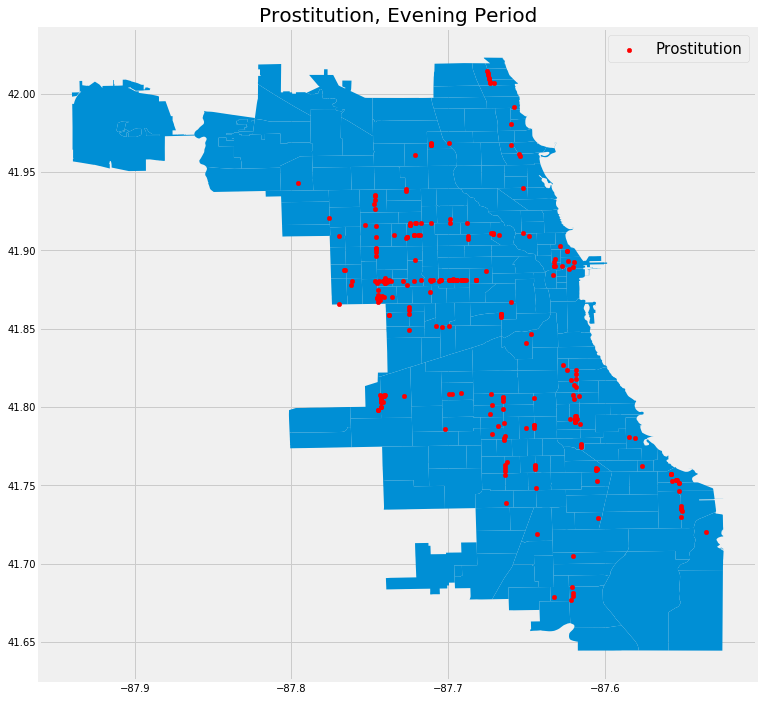

In [96]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_evg[geo_df_evg['Primary Type'] == 'PROSTITUTION'].plot(ax=ax, markersize=20, color='red', marker='o', label='Prostitution')
plt.title('Prostitution, Evening Period', fontsize=20)                                                        
plt.legend(prop={'size':15})

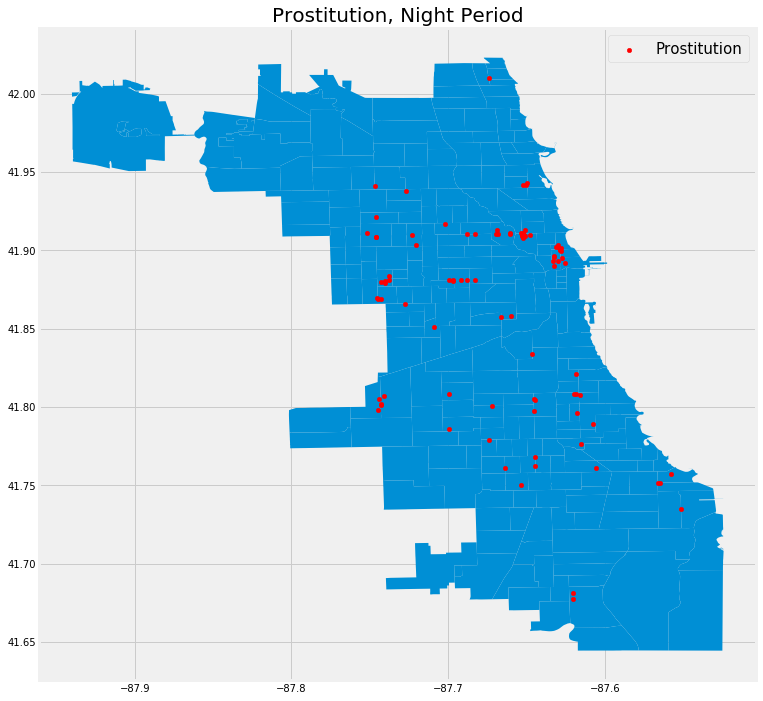

In [97]:
fig, ax = plt.subplots(figsize=(12,12))
street_map.plot(ax=ax)
geo_df_ngt[geo_df_ngt['Primary Type'] == 'PROSTITUTION'].plot(ax=ax, markersize=20, color='red', marker='o', label='Prostitution')
plt.title('Prostitution, Night Period', fontsize=20)                                                        
plt.legend(prop={'size':15})

We can see that some streets are a permanent hotspot for prostitution activities (e.g. north-south street located roughly at latitude 41.80 and longitude -87.74). In other areas such as the city downtown (roughly at latitude 41.89, longitude -87.63) prostitution activity progressively increases thoughout the 4 time periods considered in the analysis. It can also be noticed that large areas of the city remain prostitution-free.  

# 6.- Conclusions

The above analysis, although limited by the limited time constraints associated to this exercise, supports the hypothesis that certain crimes follow spatial and temporal patterns; these patterns can be taken advantage of in order to build predictive models to optimise allocation of law enforcement resources.

There are a number of ways in which the analysis can be improved:
* By taking advantage of other fields in the dataset 
* By using a greater temporal granularity (ideally on an hourly basis)
* By using a visualisation tool that supports animation (e.g. Gapminder)
* By using a geographical visualisation tool allowing greater granularity & detail (e.g. Google Maps)